Jenny Aurelia Tanaya - Assignment 2 (Sesi 10 - PYTN 103)

### NYC Property Sales  

Properties sold in New York City over a 12-month period from September 2016 to September 2017.

Objective:  
Find:  
1. Measure of Central Tendency:  
* Mean   
* Median  
* Mode  

2. Measure of Spread:
* Range
* Variance  
* Standard Deviation  

3. Probability Distribution  
4. Confidence Intervals  
5. Hypothesis Testing

But first let's import the libraries needed and clean our data!

In [1]:
# import libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import warnings
%matplotlib inline
from IPython.display import Math, Latex
from IPython.core.display import Image
from scipy.stats import uniform
from scipy.stats import kstest
from scipy.stats import norm
from scipy.stats import gamma

/var/folders/c3/_g425yfx56z0vhzwg8_2sqj40000gn/T/ipykernel_821/2372048524.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


To get started, let's import our dataset

In [2]:
# open & read data source = csv
open('nyc.csv', 'r')

# set data as data frame
df_ori = pd.read_csv('nyc.csv')

#duplicate data ori
df = df_ori.copy()
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Let's check the dataset's details:

In [3]:
df.shape

(84548, 22)

In [4]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

We notice that there's a blank column named 'EASE-MENT', let's check if it has a data or not

In [6]:
# check unique values in the 'EASE-MENT' column
unique_values = df['EASE-MENT'].unique()
print(unique_values)

[' ']


The 'APARTMENT NUMBER' column also looks blank, let's check if it has a value inside

In [7]:
print(df['APARTMENT NUMBER'].unique())

[' ' 'RES' 'UNIT1' ... '115' 'MS-B' '363']


Since there are blank values in the column, we can delete it along with the Unnammed: 0 column

In [8]:
# drop the 'Unnamed: 0' and 'EASE-MENT' columns and assign the modified DataFrame back to df
df = df.drop(['Unnamed: 0', 'EASE-MENT'], axis=1)

In [9]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Now let's check for any whitespace or emptyspace

In [10]:
counts_ = df.applymap(lambda x: str(x).count("-"))
counts_space = df.applymap(lambda x: str(x).count(" "))
print(f"there is {counts_.sum().sum()} '-' and {counts_space.sum().sum()} spaces")

/var/folders/c3/_g425yfx56z0vhzwg8_2sqj40000gn/T/ipykernel_821/3743084778.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts_ = df.applymap(lambda x: str(x).count("-"))


/var/folders/c3/_g425yfx56z0vhzwg8_2sqj40000gn/T/ipykernel_821/3743084778.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counts_space = df.applymap(lambda x: str(x).count(" "))


there is 321133 '-' and 2406973 spaces


Also let's remove any duplicated values

In [11]:
# if you see our data, it include somme missing values it represent it like '-' we will replace it by nan
# blank rows should instead be null values

map_dict={'-':np.nan,' ':np.nan}
df.replace(map_dict,inplace = True)

In [12]:
# view if there is any duplicated values
sum(df.duplicated())

765

Let's identify for any missing values

In [13]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

There are several missing values after we define it in the columns 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', and 'APARTMENT NUMBER'.

Let's handle the non-numeric data in numeric columns, so they can be computed later

In [21]:
numeric_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
for col in df.columns:
    if col in numeric_columns:
        # convert to numeric, setting errors to 'coerce' to handle non-numeric values
        df[col] = pd.to_numeric(df[col], errors='coerce')

Now impute the missing values

In [22]:
# imputing missing values in 'LAND SQUARE FEET' and 'GROSS SQUARE FEET' using the median
for col in ['LAND SQUARE FEET', 'GROSS SQUARE FEET']:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# removing rows where 'SALE PRICE' is missing
df = df.dropna(subset=['SALE PRICE'])

# Checking the changes made
df_info = {
    "Missing Values After Imputation": df[numeric_columns].isnull().sum(),
    "Remaining Rows": len(df)
}

df_info

{'Missing Values After Imputation': LAND SQUARE FEET     0
 GROSS SQUARE FEET    0
 SALE PRICE           0
 dtype: int64,
 'Remaining Rows': 69987}

Now let's check for data consistency and split the sale date into month and year 

In [14]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['year'] = df['SALE DATE'].dt.year
df['month'] = df['SALE DATE'].dt.month

In [15]:
df.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,year,month
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,NaN,10009,...,5,1633,6440,1900,2,C2,6625000,2017-07-19,2017,7
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,NaN,10009,...,31,4616,18690,1900,2,C7,-,2016-12-14,2016,12
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,NaN,10009,...,17,2212,7803,1900,2,C7,-,2016-12-09,2016,12


The SALE DATE column has been removed successfully, now let's remove that column

In [16]:
# drop SALE DATE column
df = df.drop(columns=['SALE DATE'])
df.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,year,month
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,NaN,10009,...,0,5,1633,6440,1900,2,C2,6625000,2017,7
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,NaN,10009,...,3,31,4616,18690,1900,2,C7,-,2016,12
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,NaN,10009,...,1,17,2212,7803,1900,2,C7,-,2016,12


now let's make the dataset more readable by selecting specific numbers after the decimals

In [24]:
pd.set_option('display.precision', 2)
print(df)

       BOROUGH   NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0            1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
3            1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
4            1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
6            1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
9            1  ALPHABET CITY  08 RENTALS - ELEVATOR APARTMENTS              
...        ...            ...                                          ...   
84543        5        WOODROW  02 TWO FAMILY DWELLINGS                       
84544        5        WOODROW  02 TWO FAMILY DWELLINGS                       
84545        5        WOODROW  02 TWO FAMILY DWELLINGS                       
84546        5        WOODROW  22 STORE BUILDINGS                            
84547        5        WOODROW  35 INDOOR PUBLIC AND CULTURAL FACILITIES      

      TAX CLASS AT PRESENT  BLOCK  LOT BUILDING CLASS AT PRESEN

Now let's start finding the objective

In [18]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,year,month
count,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00
mean,3.00,4237.22,376.22,10731.99,2.03,0.19,2.25,1789.32,1.66,2016.65,6.56
std,1.29,3568.26,658.14,1290.88,16.72,8.71,18.97,537.34,0.82,0.48,3.47
min,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,2016.00,1.00
25%,2.00,1322.75,22.00,10305.00,0.00,0.00,1.00,1920.00,1.00,2016.00,4.00
50%,3.00,3311.00,50.00,11209.00,1.00,0.00,1.00,1940.00,2.00,2017.00,6.00
75%,4.00,6281.00,1001.00,11357.00,2.00,0.00,2.00,1965.00,2.00,2017.00,10.00
max,5.00,16322.00,9106.00,11694.00,1844.00,2261.00,2261.00,2017.00,4.00,2017.00,12.00


### Measure of Central Tendency
#### 1. Mean
* What is the mean sale price of properties in the dataset?  
* How can we tell the mean sale price throughout different boroughs?

In [25]:
# find the mean of sale price
print('Sale Price in Average:',df['SALE PRICE'].mean())

Sale Price in Average: 1276456.4977638705


Let's look into the mean sale price per each boroughs now

In [27]:
# group by borough and sale price
mean_sale_price_by_b = df.groupby('BOROUGH')['SALE PRICE'].mean().reset_index()

# sort by mean 'SALE PRICE' in descending order
mean_sale_price_by_b = mean_sale_price_by_b.sort_values(by='SALE PRICE', ascending=False)

# display
print("Mean sale price by borough:")
print(mean_sale_price_by_b)

Mean sale price by borough:
   BOROUGH  SALE PRICE
0        1    3.34e+06
2        3    8.34e+05
3        4    7.40e+05
1        2    5.90e+05
4        5    5.43e+05


From our finding, we can tell that Borough 1 has the lowest mean sale price, and Borough 3 has the highest mean sale price.   

This may mean that a high mean price could mean that Borough 3 has higher-end features and amenities in the area, or it's a new developed area with an ever increasing sale price on its property.

To look into more details, let's look at which specific neighborhood has 

In [28]:
# filter for borough 1 and borough 3
df_b_1 = df[df['BOROUGH'] == 1]
df_b_3 = df[df['BOROUGH'] == 3]

# calculate mean price for each neighborhood in borough 1
mean_b_1 = df_b_1.groupby('NEIGHBORHOOD')['SALE PRICE'].mean()

# calculate mean price for each neighborhood in borough 3
mean_b_3 = df_b_3.groupby('NEIGHBORHOOD')['SALE PRICE'].mean()

# neighborhood with the lowest mean price in borough 1
lowest_mean_price_borough_1 = mean_b_1.idxmin()

# neighborhood with the highest mean price in borough 3
highest_mean_price_borough_3 = mean_b_3.idxmax()

print("Neighborhood with lowest mean price in Borough 1:", lowest_mean_price_borough_1)
print("Neighborhood with highest mean price in Borough 3:", highest_mean_price_borough_3)

Neighborhood with lowest mean price in Borough 1: MORNINGSIDE HEIGHTS
Neighborhood with highest mean price in Borough 3: DOWNTOWN-METROTECH


* This tells us that the neighborhood Morningside Heights has relatively more affordable property prices.   
* Investors can see potential for growth and development in this area, highlighting the affordability of this area  

* On the other hand, the neighborhood Downtown - Metrotech has the highest property prices in New York.  
* This may mean that the target audience for this area is for affluent clients or luxury investors. Investors or developers should cater their services accordingly for more premium properties.

#### 2. Median  

* What is the median sale price of properties in the dataset?  

In [ ]:
# find the median of sale price
print('Median of Sale Price:',df['SALE PRICE'].median())

Median of Sale Price: 530000.0


The median sale price shows the price range of properties that are "more representative" of the market. By knowing the median also helps in setting competitive prices that appeal to a wider range of buyers.

Now let's compare the mean to the median

The mean sale price is: 1276456.5 

Meanwhile, the median sale price is: 530000

If the median sale price is significantly lower or higher than the mean, it suggests the data may be skewed.   
Let's check: 

In [ ]:
# check the skewness
print(f"Skewness: {df['SALE PRICE'].skew()}")

Skewness: 124.09425128278802


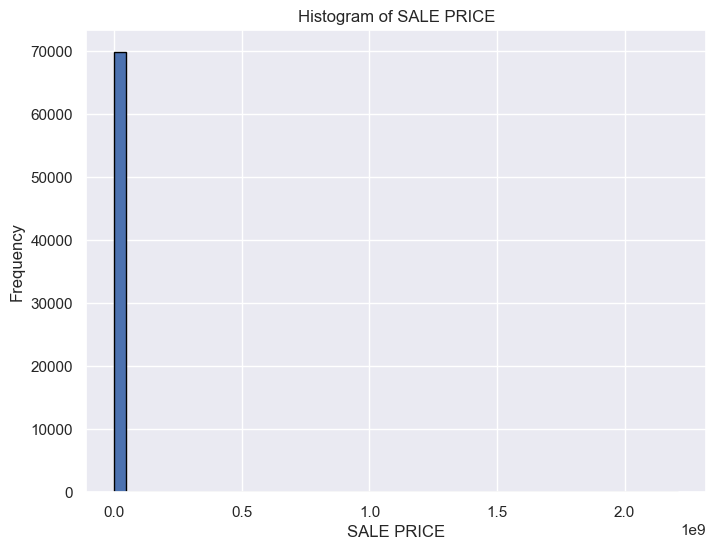

In [ ]:
# replace with 'SALE PRICE' column
data = df['SALE PRICE'].dropna()  # drop missing values

# plot histogram
plt.figure(figsize=(8, 6))
plt.hist(data, bins=50, edgecolor='black')
plt.xlabel('SALE PRICE')
plt.ylabel('Frequency')
plt.title('Histogram of SALE PRICE')
plt.grid(True)
plt.show()

This shows that sale price is right-skew (positively skewed) which suggests a huge imbalance in the data distribution.  

The majority of sale prices are likely clustered at lower values.  
It indicates that there may be some properties with   exceptionally high prices, which are driving the mean sale price higher than the median.    


Why is it important to consider the skewness of sale price? 

* So that real estate developers may need to focus on the lower end of the market, where most buyers are.  

* Investors may be interested in understanding the factors behind the high-end luxury market.  

* Buyers should be aware that the average sale price may not represent the typical property they are looking for.

#### 3. Mode  

* Which building class category occurs most frequently in the dataset?


In [ ]:
# find mode
print('Mode of Building Class Category:',df['BUILDING CLASS CATEGORY'].mode().values[0],'steps')

Mode of Building Class Category: 01 ONE FAMILY DWELLINGS                     steps


This tells us that One Family Dwellings is the most common building types in the market. It also suggests that there's a high demand for single-family homes.   
By knowing this, it can guide investment decisions in that category and predict future demand and pricing strategies

### Measure of Spread

#### 4. Range  

What is the difference between the highest and lowest values of 'SALE PRICE'?

In [ ]:
# find range
range = df['SALE PRICE'].max() - df['SALE PRICE'].min()
print('Range of sale price:',range)

Range of sale price: 2210000000.0


Knowing the range of the sale price can help real estate agents and sellers to set realistic prices around the range. It also helps businesses to know their competitiveness compared to their competitors, set pricing to be around the range of 2210000000

Meanwhile, buyers and sellers can use the range as a negotiation tool. If a property is priced near the upper end of the range, buyers may negotiate for a lower price.


#### 5. Variance  

* What is the variance of 'LAND SQUARE FEET'? 

In [29]:
# find variance 
variance = df['LAND SQUARE FEET'].var()
print('Variance of land square feet data:',variance)

Variance of land square feet data: 1136015085.9747322


Knowing the variance of land square feet in this dataset helps to understand size differences of each properties, in this case it's a big one.  

Businesses can segment the market based on this. In this case, properties with large land sizes might target luxury buyers, while smaller sizes cater to budget-conscious buyers.

#### 5. Standard Deviation:  

* How spread out are the 'GROSS SQUARE FEET' values from the mean?

In [30]:
# find standard deviation
std = df['GROSS SQUARE FEET'].std()
print('Standard Deviation of gross square feet data:',std)

Standard Deviation of gross square feet data: 24490.47893755528


The standard deviation of 'GROSS SQUARE FEET' provides how much the sizes of properties vary within the dataset which is 24490.5 (rounded).

This suggest that there's a wider range of property sizes.

This also helps real estate agents to set prices, leading to a wider price range for similar properties.

### Probability Distribution  

#### 7. Uniform Distribution  

* Is the 'SALE PRICE' data uniformly distributed across the range?

In [ ]:
# random numbers from uniform dist.
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)

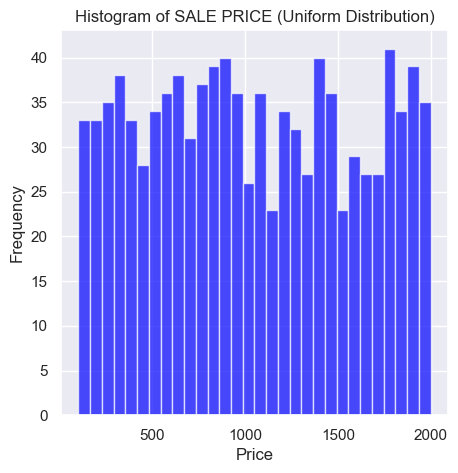

/var/folders/c3/_g425yfx56z0vhzwg8_2sqj40000gn/T/ipykernel_709/1144486215.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interval_counts = df_uniform.groupby(pd.cut(df_uniform['SALE PRICE'], bins=np.arange(min_price, max_price, interval_width))).size()


Frequency of observations in each interval:
SALE PRICE
(101.037, 290.897]      100
(290.897, 480.757]       99
(480.757, 670.617]      108
(670.617, 860.477]      107
(860.477, 1050.337]     102
(1050.337, 1240.197]     93
(1240.197, 1430.057]     99
(1430.057, 1619.917]     88
(1619.917, 1809.776]     95
dtype: int64


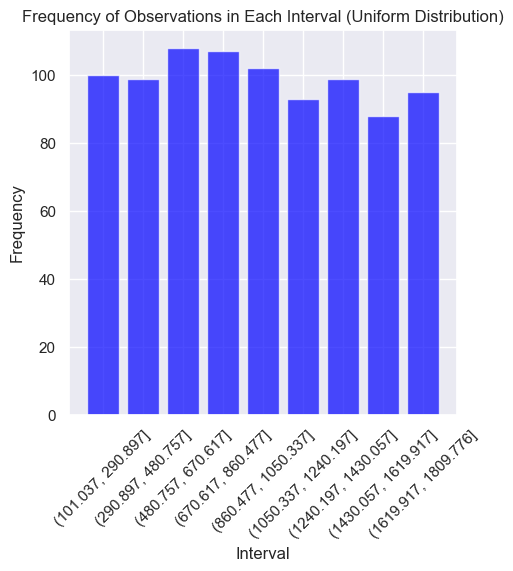

Kolmogorov-Smirnov test p-value: 0.005894826469583204


In [ ]:
# generate synthetic dataset following a uniform distribution
np.random.seed(0)  # Set seed for reproducibility
num_samples = 1000  # Number of samples
min_value = 100  # Minimum value of the uniform distribution
max_value = 2000  # Maximum value of the uniform distribution
data_uniform = uniform.rvs(loc=min_value, scale=max_value-min_value, size=num_samples)

# create df
df_uniform = pd.DataFrame({'SALE PRICE': data_uniform})

# plot histogram for sale price
plt.hist(df_uniform['SALE PRICE'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of SALE PRICE (Uniform Distribution)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# calculate range of sale price
min_price = df_uniform['SALE PRICE'].min()
max_price = df_uniform['SALE PRICE'].max()
data_range = max_price - min_price

# divide range into equal intervals
num_intervals = 10  # Choose number of intervals
interval_width = data_range / num_intervals

# check frequency of observations in each interval
interval_counts = df_uniform.groupby(pd.cut(df_uniform['SALE PRICE'], bins=np.arange(min_price, max_price, interval_width))).size()

# print interval counts
print("Frequency of observations in each interval:")
print(interval_counts)

# plot bar chart of interval counts
plt.bar(interval_counts.index.astype(str), interval_counts.values, color='blue', alpha=0.7)
plt.title('Frequency of Observations in Each Interval (Uniform Distribution)')
plt.xlabel('Interval')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# perform statistical tests (e.g., Kolmogorov-Smirnov test or Chi-square test) to formally test for uniformity
# example:
from scipy.stats import kstest

# perform Kolmogorov-Smirnov test
ks_statistic, p_value = kstest(df_uniform['SALE PRICE'], 'uniform', args=(min_price, max_price))
print("Kolmogorov-Smirnov test p-value:", p_value)

From the result, we can see that the intervals of the same distribution is not that similar. It mostly varies around 30 and 40, but the lowest case is in 20. This shows that the sale price is not uniformly distributed. 

Similarly, from the Kolmogorov-Smirnov test performed, it tells us that the p-value is way below 0.05, indicating that the sale price is not uniformally distributed. 

This means that the market of properties are not balanced and may be priced unevenly across the range, making the market more unpredictable. Real estate agents should take this problem into account and set more fair and equal prices across ranges. 

#### 8. Normal Distribution 

* Does the p-value indicate that the 'SALE PRICE' data is normally distributed?

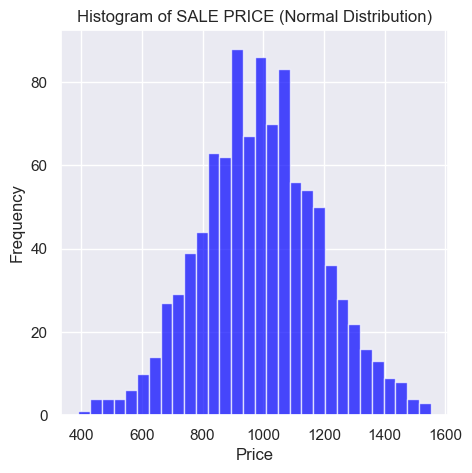

Mean of SALE PRICE: 990.948658501961
Standard deviation of SALE PRICE: 197.50540913890265
Shapiro-Wilk test for SALE PRICE: ShapiroResult(statistic=0.9985560774803162, pvalue=0.5916484594345093)


In [ ]:
# generate synthetic dataset following a normal distribution
np.random.seed(0)  # Set seed for reproducibility
num_samples = 1000  # Number of samples
mean_price = 1000  # Mean of the normal distribution
std_dev_price = 200  # Standard deviation of the normal distribution
data_normal = norm.rvs(loc=mean_price, scale=std_dev_price, size=num_samples)

# create DataFrame
df_normal = pd.DataFrame({'SALE PRICE': data_normal})

# plot histogram for sale price
plt.hist(df_normal['SALE PRICE'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of SALE PRICE (Normal Distribution)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# calculate mean and standard deviation of sale price
mean_price = df_normal['SALE PRICE'].mean()
std_dev_price = df_normal['SALE PRICE'].std()
print("Mean of SALE PRICE:", mean_price)
print("Standard deviation of SALE PRICE:", std_dev_price)

# perform normality test (e.g., Shapiro-Wilk test)
from scipy.stats import shapiro
shapiro_test = shapiro(df_normal['SALE PRICE'])
print("Shapiro-Wilk test for SALE PRICE:", shapiro_test)

From the histogram above, the curve looks bell-shaped, suggesting that the data follows a normal distribution, because the mean is symmetrically distributed.

To be more certain, the Shapiro-Wilk test is also done and the p-value is above 0.05 (p-value of sale price=0.5).  
This tells us that the data is likely normally distributed.

A normal distribution of sale price suggests that prices are evenly distributed around the mean. This mean that the sale price can be used as a reference for setting listing prices.

Let's do the normal distribution with PDF (Probability Density Function) to see the bell-shaped curve more easily.

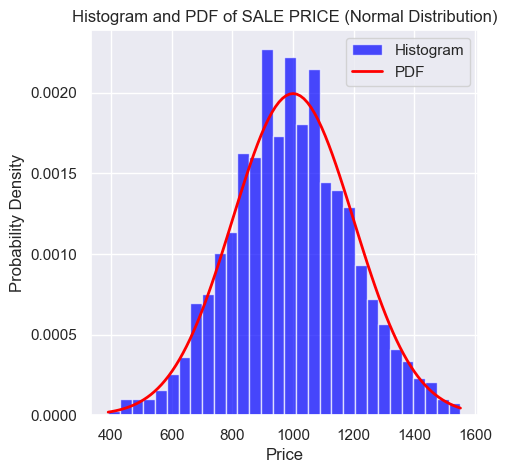

In [ ]:
# generate synthetic dataset following a normal distribution
np.random.seed(0)  # Set seed for reproducibility
num_samples = 1000  # Number of samples
mean_price = 1000  # Mean of the normal distribution
std_dev_price = 200  # Standard deviation of the normal distribution
data_normal = norm.rvs(loc=mean_price, scale=std_dev_price, size=num_samples)

# create DataFrame
df_normal = pd.DataFrame({'SALE PRICE': data_normal})

# plot histogram for sale price
plt.hist(df_normal['SALE PRICE'], bins=30, color='blue', alpha=0.7, density=True, label='Histogram')

# plot PDF of the normal distribution
x_values = np.linspace(df_normal['SALE PRICE'].min(), df_normal['SALE PRICE'].max(), 100)
pdf_values = norm.pdf(x_values, loc=mean_price, scale=std_dev_price)
plt.plot(x_values, pdf_values, color='red', linestyle='-', linewidth=2, label='PDF')

plt.title('Histogram and PDF of SALE PRICE (Normal Distribution)')
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

This confirms that sale price is normally distributed.   
The PDF can be used to forecast future price trends and take a  closer look at the outliers.

#### 9. Confidence Intervals

* What is the confidence interval of the sale price?

In [ ]:
# replace with sale price column
data = df['SALE PRICE'].dropna()  # drop missing values

# confidence level (95%)
confidence_level = 0.95

# calculate mean and standard error
mean = np.mean(data)
std_error = stats.sem(data)

# calculate margin of error
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, len(data) - 1) * std_error

# calculate confidence interval
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print("Confidence interval for the mean SALE PRICE:")
print("Mean:", mean)
print("Margin of Error:", margin_of_error)
print("Confidence Interval:", confidence_interval)

Confidence interval for the mean SALE PRICE:
Mean: 1276456.4977638705
Margin of Error: 84499.06937900101
Confidence Interval: (1191957.4283848696, 1360955.5671428714)


From the result, the confidence interval is nearing the mean sale price but not narrow enough (1191957.43 - 1360955.57) with the confidence level of 95%. 

But since the range is considerably wider, it may mean that there is more uncertainty of sale price. Sale price might seen as varying.  

Decision makers has to be more cautious in setting pricing strategies in this volatile market

#### 10. Hypothesis Testing

* H0: the mean sale price is equal to $500,000  
  H1: the mean sale price is not equal to $500,000

Now calculate the p-value with an alpha 0.05 (5% significance level)

In [ ]:
# replace with sale price
data = df['SALE PRICE'].dropna()  # Drop missing values

# hypothetical mean for comparison
hypothetical_mean = 500000

# perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(data, hypothetical_mean)

# set significance level
alpha = 0.05

# interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. Mean SALE PRICE is significantly different from $500,000.")
else:
    print("Fail to reject the null hypothesis. Mean SALE PRICE is not significantly different from $500,000.")

# additional output
print("t-statistic:", t_stat)
print("p-value:", p_value)

Reject the null hypothesis. Mean SALE PRICE is significantly different from $500,000.
t-statistic: 18.01029409988187
p-value: 2.3584029738773677e-72


Because the p-value is less than the alpha, we reject the H0, that we don't have enough evidence to say it's significantly different from $500,000. The t-statistic also showed that there's a greater difference  

This means that businesses might adjust prices based on the actual mean sale price in the dataset.

#### 11. Pearson's Correlation  
* Is there a significant correlation between 'LAND SQUARE FEET' and 'SALE PRICE' in the NYC Property Sales dataset?  

H0: There is no correlation between 'LAND SQUARE FEET' and 'SALE PRICE'.  
H1: There is a correlation between 'LAND SQUARE FEET' and 'SALE PRICE'.

In [ ]:
# filter out rows with missing values 
data_subset = df[['LAND SQUARE FEET', 'SALE PRICE']].dropna()

# extract data from filtered
data_land_square_feet = data_subset['LAND SQUARE FEET']
data_sale_price = data_subset['SALE PRICE']

# perform Pearson's correlation test
corr_coef, p_value = stats.pearsonr(data_land_square_feet, data_sale_price)

# set significance level
alpha = 0.05

# interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between 'LAND SQUARE FEET' and 'SALE PRICE'.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between 'LAND SQUARE FEET' and 'SALE PRICE'.")

# additional output
print("Pearson's correlation coefficient:", corr_coef)
print("p-value:", p_value)

Reject the null hypothesis. There is a significant correlation between 'LAND SQUARE FEET' and 'SALE PRICE'.
Pearson's correlation coefficient: 0.06018342604606782
p-value: 2.1208188917503075e-40


From the result, we reject the null hypothesis because the p-value is smaller than the alpha.  
So this means that there is a significant correlation between land square feet and sale price. 

By knowing this correlation, this helps to guide decisions on the size and pricing of properties.